## Link performance functions used in the counterexample

In [1]:
import numpy as np

def tt_0(x: float) -> float:
    return x*x

def tt_1(x: float) -> float:
    return 1

## Exact calculation of expected link travel times

In the following function, basically we iterate through all $2^N$ route choice combinations, calculate the probability of each scenario using the given user preferences towards the first route $p0$, and calculate the weighted averages of the travel times of the two links/routes of all these $2^N$ scenarios.

In [2]:
def exact_calc(p0: np.ndarray, debug=False) -> (np.ndarray, np.ndarray):
    N = len(p0)
    p1 = 1 - p0

    total_expected = np.array([0., 0.])

    for i in range(2**N):
        # convert int i to N-bit representation
        choices = convert_to_n_choice(int(i), N)
        p = 1.
        for j in range(N):
            p = p * (p1[j] if choices[j] else p0[j])
        t1 = tt_1(float(sum(choices)))
        t0 = tt_0(float(N - sum(choices)))
        total_expected[0] += p * t0
        total_expected[1] += p * t1
    if (debug):
        print("Exact calc:")
        print(total_expected)
    return total_expected

def convert_to_n_choice(i: int, N: int) -> np.ndarray:
    binary = bin(i)[2:]  # convert i to binary string
    binary = binary.zfill(N)  # pad with leading zeros to make it N bits long
    binary_array = np.array(list(binary), dtype=int)  # convert binary string to numpy array of integers
    return binary_array

## Approximated calculation of expected link travel times

In the following function, we calculate the expected flow on each link/route, then use the expected flows in the link performance functions to approxiamte the expected link travel times.

In [3]:
def approx_calc(p0: np.ndarray, debug=False) -> np.ndarray:
    N = len(p0)
    p1 = 1 - p0

    total_expected = np.array([tt_0(sum(p0)), tt_1(sum(p1))])
    if (debug):
        print("Approx calc:")
        print(total_expected)
    return total_expected

## Run repeated experiments to calculate the average percentage error of the approximate calculations

By default, repeat 20 times with random $p0$.

In [4]:
def repeat_exp(N: int, repeat_num: int=20):
    percent_errs = np.zeros((repeat_num, 2))
    for run in range(repeat_num):
        p0 = np.random.random(N)

        exact_expected = exact_calc(p0)
        approx_expected = approx_calc(p0)

        percent_errs[run] = [abs(approx_expected[i] - exact_expected[i])/exact_expected[i]*100 for i in range(2)]

    average_percent_err = np.average(percent_errs, axis=0)
    
    print(f"Average percentage errors with {N} Users: {average_percent_err[0]:.2f}% and {average_percent_err[1]:.2f}%")
    
    return average_percent_err[0]

## Results

Average percentage errors with 2 Users: 32.01% and 0.00%
Average percentage errors with 3 Users: 19.63% and 0.00%
Average percentage errors with 4 Users: 16.53% and 0.00%
Average percentage errors with 5 Users: 15.18% and 0.00%
Average percentage errors with 6 Users: 12.45% and 0.00%
Average percentage errors with 7 Users: 9.76% and 0.00%
Average percentage errors with 8 Users: 8.19% and 0.00%
Average percentage errors with 9 Users: 8.93% and 0.00%
Average percentage errors with 10 Users: 6.88% and 0.00%
Average percentage errors with 11 Users: 7.67% and 0.00%
Average percentage errors with 12 Users: 5.30% and 0.00%
Average percentage errors with 13 Users: 5.19% and 0.00%
Average percentage errors with 14 Users: 4.79% and 0.00%
Average percentage errors with 15 Users: 4.39% and 0.00%
Average percentage errors with 16 Users: 4.50% and 0.00%
Average percentage errors with 17 Users: 4.42% and 0.00%
Average percentage errors with 18 Users: 4.26% and 0.00%


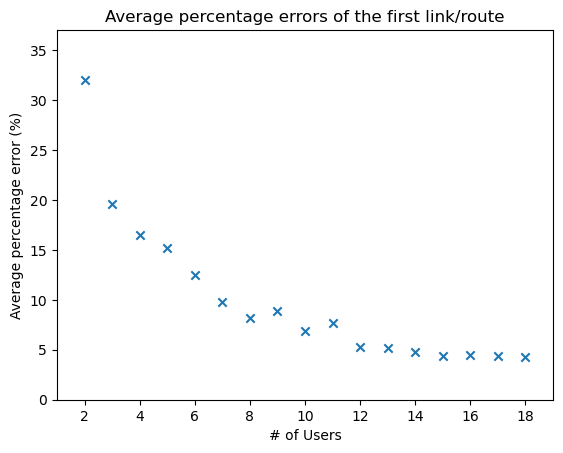

In [5]:
import matplotlib.pyplot as plt
MAX_USERS = 18
x = range(2, MAX_USERS+1)
y = [repeat_exp(int(i)) for i in x]
plt.scatter(x, y, marker='x')
plt.xlim(1, MAX_USERS+1)
plt.ylim(0, max(y)+5)
plt.xlabel("# of Users")
plt.ylabel("Average percentage error (%)")
plt.title("Average percentage errors of the first link/route")
plt.show()